In [1]:
#import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load the dataset
StudPer = pd.read_csv('student_exam_data.csv')

In [3]:
#view the first 5 rows of the dataframe
StudPer.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [4]:
#view the properties of the dataframe
StudPer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [5]:
#view the statistical description of the columns in the dataframe
StudPer.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [6]:
#view the size of the dataframe
StudPer.shape

(500, 3)

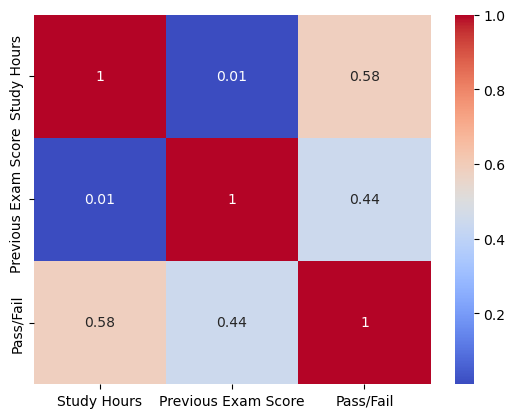

In [36]:
# Compute the correlation matrix
corr_matrix = StudPer.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

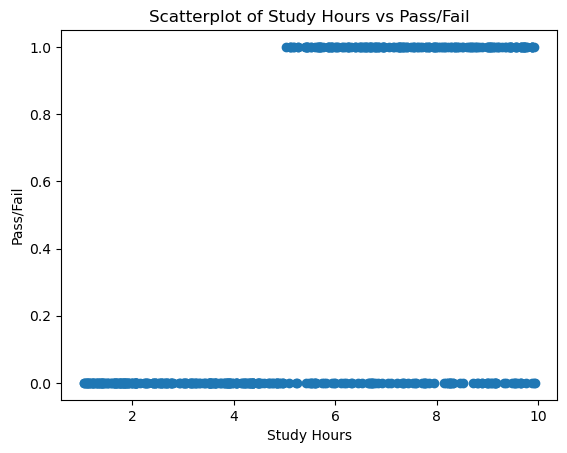

In [37]:
# Create a scatterplot between 'Study Hours' and 'Pass/Fail'
plt.scatter(StudPer['Study Hours'], StudPer['Pass/Fail'])
plt.xlabel('Study Hours')
plt.ylabel('Pass/Fail')
plt.title('Scatterplot of Study Hours vs Pass/Fail')
plt.show()

In [11]:
#divide the dataframe into features(X) and class label(y)
X = StudPer.drop('Pass/Fail', axis = 1)
y = StudPer['Pass/Fail']

In [12]:
X

,Study Hours,Previous Exam Score
0,4.370861,81.889703
1,9.556429,72.165782
2,7.587945,58.571657
3,6.387926,88.827701
4,2.404168,81.083870
...,...,...
495,4.180170,45.494924
496,6.252905,95.038815
497,1.699612,48.209118
498,9.769553,97.014241


In [13]:
y

0      0
1      1
2      0
3      1
4      0
      ..
495    0
496    1
497    0
498    1
499    1
Name: Pass/Fail, Length: 500, dtype: int64

In [14]:
#split the dataframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [15]:
#standardize the train set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 7.46883002e-01, -1.64867877e-01],
       [-6.18543441e-01, -8.30864693e-02],
       [-1.42391154e-01, -3.86718125e-01],
       [-1.16170838e+00,  1.49987946e+00],
       [-1.18514663e+00,  7.50541219e-01],
       [-2.64931916e-01, -1.04940147e+00],
       [-7.61697876e-01, -1.27293788e-01],
       [ 1.33137573e+00, -1.18255071e+00],
       [ 1.16418912e+00,  9.12603804e-01],
       [-4.43436956e-01, -4.05339535e-01],
       [-1.25573669e-01, -1.48973103e+00],
       [ 1.57114849e+00,  8.88733970e-02],
       [-8.69033720e-01, -3.61344290e-02],
       [ 1.13972878e-01,  9.73697286e-01],
       [ 4.17637701e-01, -1.58547093e+00],
       [-6.36164887e-01, -3.53353860e-01],
       [ 9.81051943e-01, -7.10484604e-02],
       [-1.56036886e+00,  1.84700348e+00],
       [ 1.22468073e+00, -1.20687966e+00],
       [-6.26754764e-01, -7.90734411e-01],
       [-1.18522837e+00, -1.08348487e+00],
       [-1.38456816e+00,  1.11539054e+00],
       [-5.16364660e-01, -1.33300842e+00],
       [-1.

In [17]:
X_test

array([[ 1.44051517e+00, -9.34661430e-01],
       [-1.44801237e+00,  1.29208199e+00],
       [ 2.88801856e-02, -6.94313343e-01],
       [-1.04970415e+00, -1.55360331e+00],
       [-5.24624611e-01,  5.70505421e-01],
       [-1.63149930e+00,  1.21375372e+00],
       [-5.51072374e-02,  9.63790738e-01],
       [-3.96644725e-01,  8.18506861e-01],
       [-1.23915056e+00, -7.81842345e-01],
       [-3.98364227e-01,  1.06948109e+00],
       [-6.94203672e-01, -5.04310890e-01],
       [-1.59209666e+00,  1.53639835e+00],
       [-1.08177972e+00, -1.09028392e+00],
       [ 1.25992627e+00, -1.28900666e+00],
       [-4.67685162e-01,  9.48620039e-01],
       [-9.09849053e-01,  1.61044091e+00],
       [ 3.70408582e-01, -1.12192095e+00],
       [ 4.63310587e-01, -9.84880883e-01],
       [ 6.99733553e-01, -4.29241466e-01],
       [-6.11098396e-01,  1.26300154e+00],
       [-2.22190448e-01, -1.20101082e+00],
       [ 4.38483351e-01, -1.35490094e+00],
       [-7.18898185e-01,  1.23011537e+00],
       [ 7.

In [19]:
#view the distribution of class labels in the dataframe
y_train.value_counts()

0    224
1    126
Name: Pass/Fail, dtype: int64

In [21]:
#apply SMOTE on the train set to deal with the class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [22]:
y_train.value_counts()

1    224
0    224
Name: Pass/Fail, dtype: int64

In [24]:
#initiate the classifier
DTmodel = DecisionTreeClassifier()

In [25]:
DTmodel

DecisionTreeClassifier()

In [26]:
#train the model
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
#view the predicted outcomes of the model
y_predDT = DTmodel.predict(X_test)
y_predDT

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
from sklearn import metrics

In [29]:
accDT = metrics.accuracy_score(y_test, y_predDT)
accDT

0.9933333333333333

In [30]:
precDT = metrics.precision_score(y_test, y_predDT)
precDT

1.0

In [31]:
recDT = metrics.recall_score(y_test, y_predDT)
recDT

0.9827586206896551

In [32]:
rocDT = metrics.roc_auc_score(y_test, y_predDT)
rocDT

0.9913793103448276

In [33]:
f1_scoreDT = metrics.f1_score(y_test, y_predDT)
f1_scoreDT

0.9913043478260869

In [34]:
cmDT = metrics.confusion_matrix(y_test, y_predDT)
cmDT

array([[92,  0],
       [ 1, 57]], dtype=int64)

In [35]:
#view the classification report
result_DT = metrics.classification_report(y_test, y_predDT)
print('Classification Report:\n')
print(result_DT)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      0.98      0.99        58

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



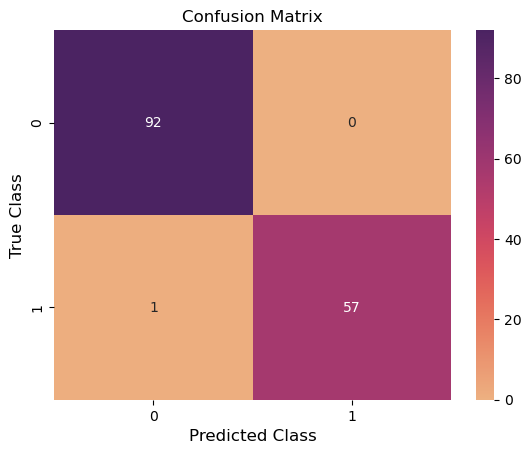

In [38]:
#visualize the confusion matrix
ax = sns.heatmap(cmDT, cmap = 'flare', annot= True, fmt = 'd')
plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 12)
plt.show()

In [39]:
#Make predictions based on the training set
y_train_predDT = DTmodel.predict(X_train)

#Make predictions based on the test set
y_test_predDT = DTmodel.predict(X_test)

#Calculate the accuracy of the training set
acc_trainDT = metrics.accuracy_score(y_train, y_train_predDT)

#Calculate the accuracy of the test set
acc_testDT = metrics.accuracy_score(y_test, y_test_predDT)

print('Training Accuracy:', acc_trainDT)
print('Test Accuracy:', acc_testDT)

Training Accuracy: 1.0
Test Accuracy: 0.9933333333333333


In [40]:
#initiate the random forest classifier
RFmodel = RandomForestClassifier()

In [41]:
#train the random forest classifier
RFmodel.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
#view the predicted outcomes of the model
y_predRF = RFmodel.predict(X_test)
y_predRF

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
accRF = metrics.accuracy_score(y_test, y_predRF)
accRF

0.9933333333333333

In [44]:
precRF = metrics.precision_score(y_test, y_predRF)
precRF

1.0

In [45]:
recRF = metrics.recall_score(y_test, y_predRF)
recRF

0.9827586206896551

In [46]:
ROCRF = metrics.roc_auc_score(y_test, y_predRF)
ROCRF

0.9913793103448276